In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [2]:
def annotate(ax, yPos, label=[]):
    for i in range(len(yPos)):
        x = i
        y = yPos[i]
        ax.annotate(label[i] if len(label) > 0 else np.round(y, decimals=2), xy=(x, y), xycoords='data',
                xytext=(-20, -40), textcoords='offset points',
                arrowprops=dict(facecolor='crimson', shrink=0.05),
                horizontalalignment='right', verticalalignment='bottom')

1. 阴线最低价，且前一天是成交量最大的阴线（收盘价低于开盘价）
    * 收盘价连续3天高于1的条件时提醒
2. 区间最低价，3天内收盘价高于最低价当天的最高价
3. 区间最低价之后的所有涨停板
4. 百个工作日的最高成交量

## 1.收盘价当天以及前3天都高于“压力位”时提醒
* 压力位条件：“成交量最大”的阴线(柱)次日的“日最低价”
* 阴线就是收盘价低于开盘价
* 

[*********************100%***********************]  1 of 1 completed


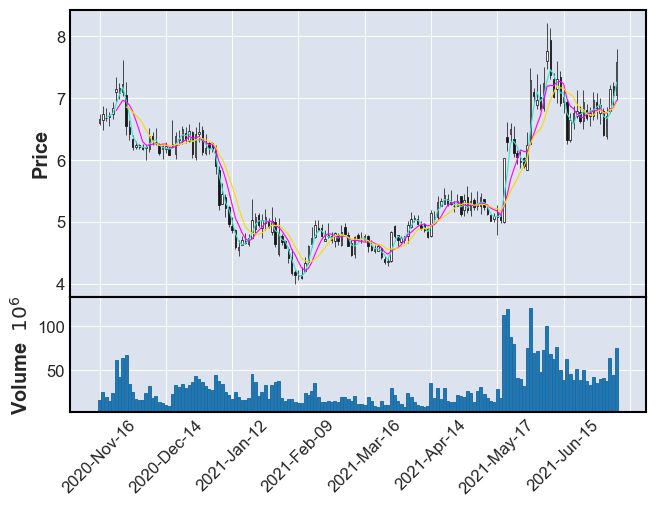

In [3]:
from pandas_datareader import data as pdr
# 将yahoo finance下载的数据格式设为Pandas Dataframe
yf.pdr_override()

# pthj = pdr.get_data_yahoo("603603.SS", start="2021-05-20", end="2021-10-22")
df = pdr.get_data_yahoo('300477.SZ', start="2020-11-16", end="2021-07-08")
mpf.plot(df,type='candle',mav=(3,6,9),volume=True)

            Open  High   Low  Close  Adj Close     Volume  Cloudy
Date                                                             
2021-05-20  6.37  6.62  6.15    6.3        6.3  119899764    True


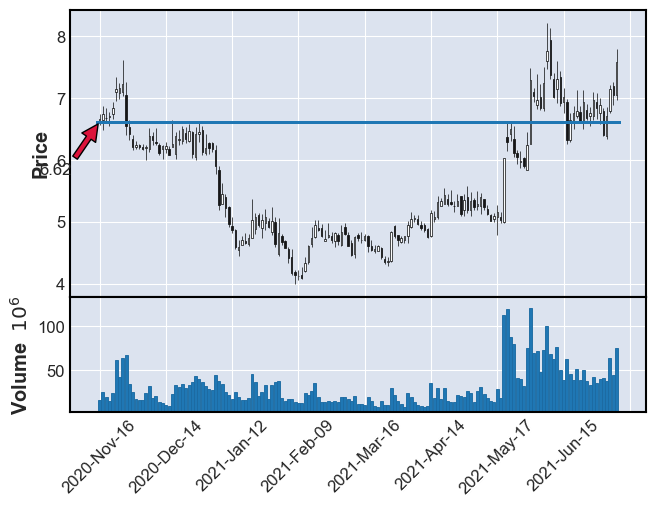

In [31]:
# 成交量最大的阴线
# Volume.max() & Close < Open
df['Cloudy'] = df['Close'] < df['Open']
# maxCloudy = pthj[(pthj['cloudy'] == True) & (pthj['Volume'] == pthj['Volume'].max())]

def get_max(df, seriesName):
    return df[df[seriesName] == df[seriesName].max()]

max_cloudy = get_max(df[df['Cloudy'] == True], 'Volume')
# df_cloudy = df[df['cloudy'] == True]
# max_cloudy = df_cloudy[df_cloudy['Volume'] == df_cloudy['Volume'].max()]
print(max_cloudy)
# mpf.plot(df,type='candle',volume=True,hlines=max_cloudy['High'].values[0])
# print(df['High'][df.index == max_cloudy.index.values[0]])
fig, axlist = mpf.plot(df, type='candle', volume=True, hlines=max_cloudy['High'].values[0] , returnfig=True)
annotate(axlist[0], pd.Series(df['High'][df.index == max_cloudy.index.values[0]]))

Date
2021-05-21    6.31
Name: Low, dtype: float64


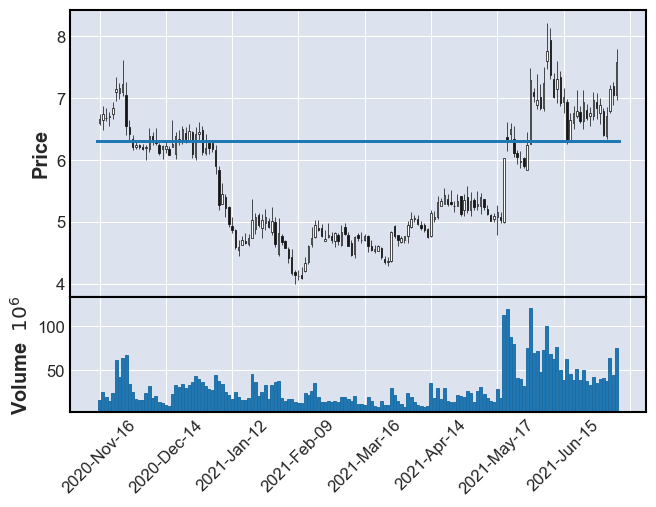

In [148]:
# 次日的“日最低价”
# maxCloudy.shift(1)['Low']
pres_1 = pthj[pthj.index > maxCloudy.index.values[0]].head(1)
print(pres_1['Low'])
mpf.plot(pthj,type='candle',volume=True,hlines=pres_1['Low'].values[0])

In [157]:
# 收盘价连续3天高于pres_1
# x.shift(1)['Close'] > pres_1['Close'] three times
signal_1 = pthj[(pthj.shift(1)['Close'] > pres_1['Close'].values[0]) & (pthj.shift(2)['Close'] > pres_1['Close'].values[0]) & (pthj.shift(3)['Close'] > pres_1['Close'].values[0]) & (pthj['Close'] > pres_1['Close'].values[0])]

print('信号')
print(signal_1)

print('\n\n压力位')
print(pres_1)
# if(len(signal_1) > 0):
#     print('\n\n信号前三天')
#     print(pthj[pthj.index <= signal_1.index.values[0]].tail(4))
# mpf.plot(pthj,type='candle',volume=True,hlines=signal_1['Close'].values[0])

信号
            Open  High   Low  Close  Adj Close     Volume  cloudy
Date                                                             
2020-11-19  6.70  6.78  6.55   6.72       6.72   15201757   False
2020-11-20  6.74  6.94  6.67   6.85       6.85   24815281   False
2020-11-23  7.11  7.35  6.95   7.15       7.15   61617436   False
2020-11-24  7.09  7.25  6.99   7.17       7.17   43019639   False
2020-11-25  7.10  7.62  7.04   7.23       7.23   64022387   False
2020-11-26  7.05  7.27  6.41   6.55       6.55   67672494    True
2021-06-03  7.03  7.23  6.82   6.84       6.84   47991344    True
2021-06-04  6.85  7.51  6.79   7.25       7.25   73021173   False
2021-06-07  7.60  8.22  7.47   7.76       7.76  100912193   False
2021-06-08  7.94  8.14  7.31   7.38       7.38   68986035    True
2021-06-09  7.31  7.41  7.01   7.02       7.02   63051388    True
2021-06-10  7.15  7.60  6.92   7.31       7.31   76906350   False
2021-06-11  7.35  7.44  6.87   6.93       6.93   50258640    True
2021-06

## 2. 区间最低价，3天内收盘价高于最低价当天的最高价
* 支撑点：区间中的最低“收盘价”
* 第3日“收盘价”高于支撑点的“日最高价”

[*********************100%***********************]  1 of 1 completed


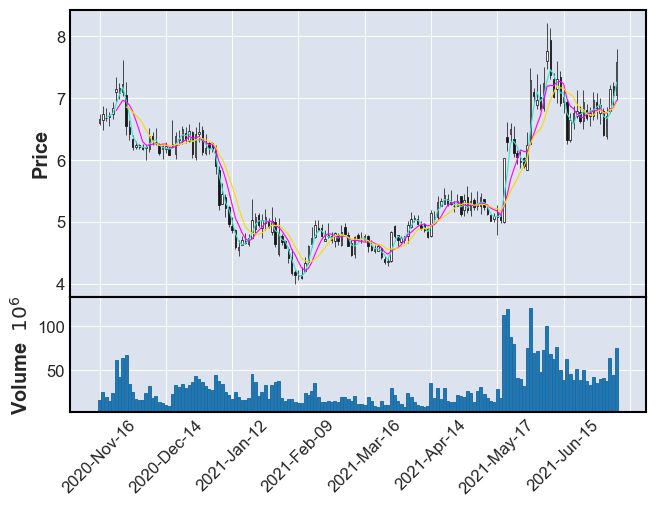

In [3]:
from pandas_datareader import data as pdr
# 将yahoo finance下载的数据格式设为Pandas Dataframe
yf.pdr_override()

df = pdr.get_data_yahoo('300477.SZ', start="2020-11-16", end="2021-07-08")
mpf.plot(df,type='candle',mav=(3,6,9),volume=True)

            Open  High   Low  Close  Adj Close    Volume
Date                                                    
2021-02-10  4.15  4.27  4.08    4.1        4.1  12701243


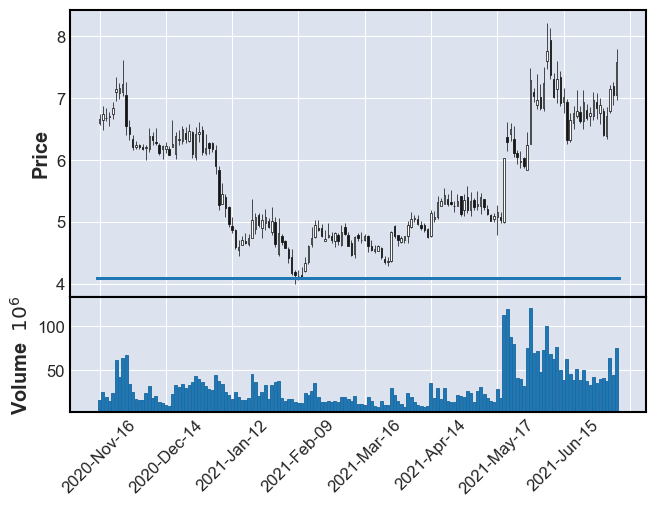

In [7]:
# 支撑点：区间中的最低“收盘价”
# Close.min()
support_1 = df[df['Close'] == df['Close'].min()]
print(support_1)
mpf.plot(df,type='candle',volume=True,hlines=support_1['Close'].values[0])

信号
            Open  High   Low  Close  Adj Close    Volume  signal_2  test
Date                                                                    
2020-11-19  6.70  6.78  6.55   6.72       6.72  15201757      6.72  6.72
2020-11-20  6.74  6.94  6.67   6.85       6.85  24815281      6.85  6.85
2020-11-23  7.11  7.35  6.95   7.15       7.15  61617436      7.15  7.15
2020-11-24  7.09  7.25  6.99   7.17       7.17  43019639      7.17  7.17
2020-11-25  7.10  7.62  7.04   7.23       7.23  64022387      7.23  7.23
...          ...   ...   ...    ...        ...       ...       ...   ...
2021-07-01  6.80  6.84  6.40   6.41       6.41  40992451      6.41  6.41
2021-07-02  6.40  6.86  6.35   6.71       6.71  37710240      6.71  6.71
2021-07-05  6.79  7.21  6.77   7.15       7.15  64171490      7.15  7.15
2021-07-06  7.20  7.27  6.90   7.05       7.05  44687906      7.05  7.05
2021-07-07  7.05  7.79  6.98   7.58       7.58  75462996      7.58  7.58

[150 rows x 8 columns]


前三天
            Open  

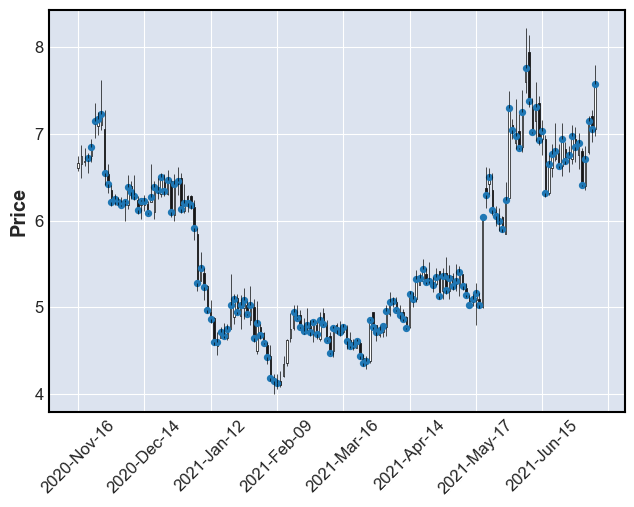

In [55]:
# 第3日“收盘价”高于支撑点的“日最高价”
# Close.shift(3) > support_1

df['signal_2'] = df['Close'][df.shift(3)['Close'] > support_1['High'].values[0]]
print('信号')
print(df[df['signal_2'].isnull() == False])
print('\n\n前三天')
print(df[df.index >= df[df['signal_2'].isnull() == False].index.values[0]].head())

subplot = mpf.make_addplot(df['signal_2'], type="scatter")
mpf.plot(df,type='candle',addplot=[subplot],figscale=1)

## 3. 区间最低价之后的所有涨停板
* 支撑点：区间中的最低“收盘价”
* 涨停板：“收盘价”大于前日“收盘价”的109.9%
* 涨停板当天“成交量”大于等于前1日“成交量”的180%

            Open  High   Low  Close  Adj Close    Volume  signal_2  test
Date                                                                    
2021-02-10  4.15  4.27  4.08    4.1        4.1  12701243       NaN   NaN


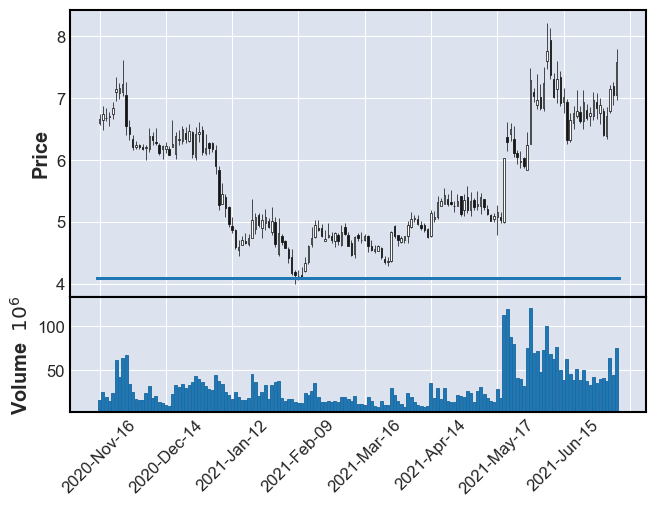

In [56]:
# 支撑点：区间中的最低“收盘价”
# Close.min()
support_1 = df[df['Close'] == df['Close'].min()]
print(support_1)
mpf.plot(df,type='candle',volume=True,hlines=support_1['Close'].values[0])

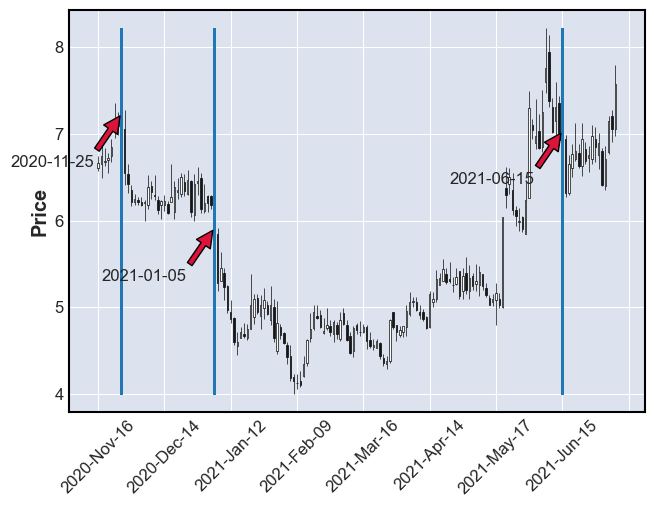

In [144]:
# 涨停板：“收盘价”大于前日“收盘价”的109.9%
# Close > Close.shift(-1) * 1.099
df['Grow Stop'] = df['Close'][df['Close'] > df['Close'].shift(-1) * 1.099]

# Debug
# print('涨停板')
# print(df[df['Grow Stop'].isnull() == False])
# print('\n\n前1天')
# print(df[df.index <= df[df['Grow Stop'] == True].index[0]].tail(2))
# pd.Series(df.index.format())[0]

# subplot = mpf.make_addplot(df['Grow Stop'], type="scatter")
# fig, axlist = mpf.plot(df,type='candle', addplot=[subplot], returnfig=True)

lines = df.index[df['Grow Stop'].isnull() == False].tolist()
fig, axlist = mpf.plot(df,type='candle', vlines=lines, returnfig=True)
annotate(axlist[0], df['Grow Stop'], pd.Series(df.index.format()))

In [159]:
# 涨停板当天“成交量”大于等于前1日“成交量”的180%
# Grow Stop >= Volume.shift(1) * 1.8
df['signal_3'] = df['Volume'][df['Grow Stop'].isnull() == False] > (df.shift(-1)['Volume'][df['Grow Stop'].isnull() == False] * 1.8)
print(df[df['signal_3'].isnull() == False])

            Open  High   Low  Close  Adj Close    Volume  signal_2  test  \
Date                                                                       
2020-11-25  7.10  7.62  7.04   7.23       7.23  64022387      7.23  7.23   
2021-01-05  6.16  6.24  5.78   5.91       5.91  44958929      5.91  5.91   
2021-06-15  6.94  7.16  6.76   7.03       7.03  39018052      7.03  7.03   

            Grow Stop signal_3  
Date                            
2020-11-25       7.23    False  
2021-01-05       5.91    False  
2021-06-15       7.03    False  
